In [47]:
import pandas as pd
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
data=pd.read_csv("Restaurant_Reviews.tsv",sep="\t")

In [49]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [50]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [51]:
data["Liked"].replace(0, value = "negatif", inplace = True)
data["Liked"].replace(1, value = "pozitif", inplace = True)

In [52]:
data.head()

,Review,Liked
0,Wow... Loved this place.,pozitif
1,Crust is not good.,negatif
2,Not tasty and the texture was just nasty.,negatif
3,Stopped by during the late May bank holiday of...,pozitif
4,The selection on the menu was great and so wer...,pozitif


In [53]:
data.groupby(by="Liked").count()

,Review
Liked,
negatif,500
pozitif,500


In [54]:
df = pd.DataFrame()
df["text"] = data["Review"]
df["label"] = data["Liked"]

In [55]:
df

,text,label
0,Wow... Loved this place.,pozitif
1,Crust is not good.,negatif
2,Not tasty and the texture was just nasty.,negatif
3,Stopped by during the late May bank holiday of...,pozitif
4,The selection on the menu was great and so wer...,pozitif
...,...,...
995,I think food should have flavor and texture an...,negatif
996,Appetite instantly gone.,negatif
997,Overall I was not impressed and would not go b...,negatif
998,"The whole experience was underwhelming, and I ...",negatif


# Metin Ön İşlem

In [56]:
#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [57]:
df.head()

,text,label
0,wow... loved this place.,pozitif
1,crust is not good.,negatif
2,not tasty and the texture was just nasty.,negatif
3,stopped by during the late may bank holiday of...,pozitif
4,the selection on the menu was great and so wer...,pozitif


In [58]:
#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

In [59]:
df

,text,label
0,wow loved this place,pozitif
1,crust is not good,negatif
2,not tasty and the texture was just nasty,negatif
3,stopped by during the late may bank holiday of...,pozitif
4,the selection on the menu was great and so wer...,pozitif
...,...,...
995,i think food should have flavor and texture an...,negatif
996,appetite instantly gone,negatif
997,overall i was not impressed and would not go back,negatif
998,the whole experience was underwhelming and i t...,negatif


In [60]:
#sayılar
df['text'] = df['text'].str.replace('\d','')

In [61]:
df

,text,label
0,wow loved this place,pozitif
1,crust is not good,negatif
2,not tasty and the texture was just nasty,negatif
3,stopped by during the late may bank holiday of...,pozitif
4,the selection on the menu was great and so wer...,pozitif
...,...,...
995,i think food should have flavor and texture an...,negatif
996,appetite instantly gone,negatif
997,overall i was not impressed and would not go back,negatif
998,the whole experience was underwhelming and i t...,negatif


In [62]:
#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [63]:
df

,text,label
0,wow loved place,pozitif
1,crust good,negatif
2,tasty texture nasty,negatif
3,stopped late may bank holiday rick steve recom...,pozitif
4,selection menu great prices,pozitif
...,...,...
995,think food flavor texture lacking,negatif
996,appetite instantly gone,negatif
997,overall impressed would go back,negatif
998,whole experience underwhelming think well go n...,negatif


In [64]:
df.groupby(by="label").count()

,text
label,
negatif,500
pozitif,500


In [65]:
df.iloc[0:100]

,text,label
0,wow loved place,pozitif
1,crust good,negatif
2,tasty texture nasty,negatif
3,stopped late may bank holiday rick steve recom...,pozitif
4,selection menu great prices,pozitif
...,...,...
95,well never go,negatif
96,back,pozitif
97,food arrived quickly,pozitif
98,good,negatif


In [66]:
data.iloc[0:100]

,Review,Liked
0,Wow... Loved this place.,pozitif
1,Crust is not good.,negatif
2,Not tasty and the texture was just nasty.,negatif
3,Stopped by during the late May bank holiday of...,pozitif
4,The selection on the menu was great and so wer...,pozitif
...,...,...
95,We'll never go again.,negatif
96,Will be back again!,pozitif
97,Food arrived quickly!,pozitif
98,It was not good.,negatif


# Matematiksel İşlemler ve Basit Özellik Çıkarımı

In [67]:
df=pd.DataFrame(df,columns=["text","label"])

In [68]:
ozellik_df=df.copy()

In [69]:
ozellik_df["karakter sayısı"]=ozellik_df["text"].str.len()

In [70]:
ozellik_df

,text,label,karakter sayısı
0,wow loved place,pozitif,15
1,crust good,negatif,10
2,tasty texture nasty,negatif,19
3,stopped late may bank holiday rick steve recom...,pozitif,61
4,selection menu great prices,pozitif,27
...,...,...,...
995,think food flavor texture lacking,negatif,33
996,appetite instantly gone,negatif,23
997,overall impressed would go back,negatif,31
998,whole experience underwhelming think well go n...,negatif,66


In [71]:
ozellik_df["kelime sayısı"]= ozellik_df["text"].apply(lambda x:len(str(x).split(" ")))

In [72]:
ozellik_df

,text,label,karakter sayısı,kelime sayısı
0,wow loved place,pozitif,15,3
1,crust good,negatif,10,2
2,tasty texture nasty,negatif,19,3
3,stopped late may bank holiday rick steve recom...,pozitif,61,9
4,selection menu great prices,pozitif,27,4
...,...,...,...,...
995,think food flavor texture lacking,negatif,33,5
996,appetite instantly gone,negatif,23,3
997,overall impressed would go back,negatif,31,5
998,whole experience underwhelming think well go n...,negatif,66,10


In [73]:
ozellik_df["özel karakter sayısı"] = ozellik_df["text"].apply(lambda x: len([x for x in x.split() 
                                       if x.startswith("good")]))

In [74]:
ozellik_df

,text,label,karakter sayısı,kelime sayısı,özel karakter sayısı
0,wow loved place,pozitif,15,3,0
1,crust good,negatif,10,2,1
2,tasty texture nasty,negatif,19,3,0
3,stopped late may bank holiday rick steve recom...,pozitif,61,9,0
4,selection menu great prices,pozitif,27,4,0
...,...,...,...,...,...
995,think food flavor texture lacking,negatif,33,5,0
996,appetite instantly gone,negatif,23,3,0
997,overall impressed would go back,negatif,31,5,0
998,whole experience underwhelming think well go n...,negatif,66,10,0


In [75]:
ozellik_df["sayı sayısı"] = ozellik_df["text"].apply(lambda x: len([x for x in x.split() 
                                       if x.isdigit()]))

In [76]:
ozellik_df

,text,label,karakter sayısı,kelime sayısı,özel karakter sayısı,sayı sayısı
0,wow loved place,pozitif,15,3,0,0
1,crust good,negatif,10,2,1,0
2,tasty texture nasty,negatif,19,3,0,0
3,stopped late may bank holiday rick steve recom...,pozitif,61,9,0,0
4,selection menu great prices,pozitif,27,4,0,0
...,...,...,...,...,...,...
995,think food flavor texture lacking,negatif,33,5,0,0
996,appetite instantly gone,negatif,23,3,0,0
997,overall impressed would go back,negatif,31,5,0,0
998,whole experience underwhelming think well go n...,negatif,66,10,0,0


# Terim Frekansı

In [77]:
tf=(df["text"]).apply(lambda x: 
                             pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [78]:
tf.columns=["words","tf"]

In [79]:
tf.head()

,words,tf
0,wow,3.0
1,loved,10.0
2,place,106.0
3,crust,2.0
4,good,95.0


In [80]:
tf.tail()

,words,tf
1931,hadnt,1.0
1932,wasted,1.0
1933,poured,1.0
1934,wound,1.0
1935,drawing,1.0


In [81]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   1936 non-null   object 
 1   tf      1936 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.4+ KB


#  Bar Plot

In [82]:
a = tf[tf["tf"] > 50]

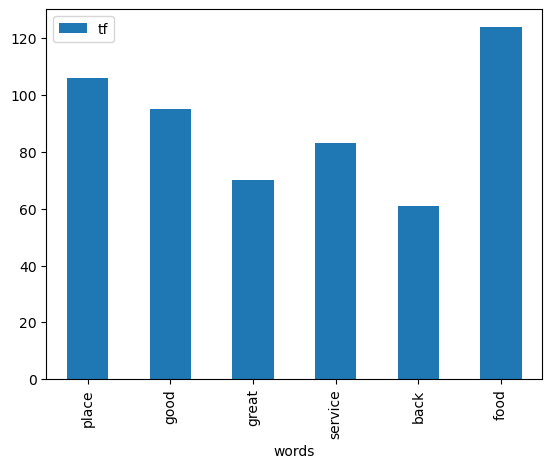

In [83]:
a.plot.bar(x = "words", y = "tf");

In [84]:
b = tf[tf["tf"] > 20];

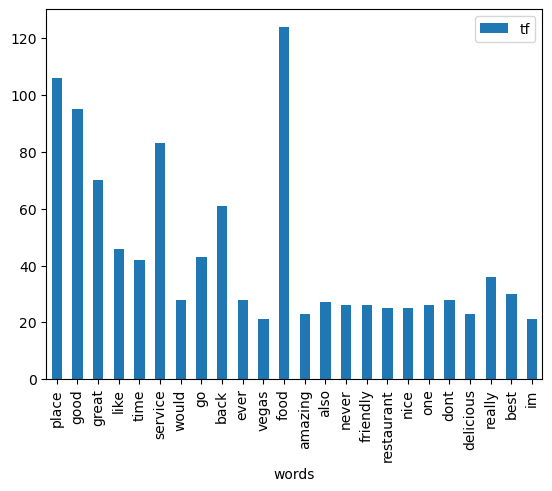

In [85]:
b.plot.bar(x = "words", y = "tf");

# Word Cloud

In [86]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [87]:
tumyorumlar = " ".join(i for i in df.text)

In [88]:
tumyorumlar

'wow loved place crust good tasty texture nasty stopped late may bank holiday rick steve recommendation loved selection menu great prices getting angry want damn pho honeslty didnt taste fresh potatoes like rubber could tell made ahead time kept warmer fries great great touch service prompt would go back cashier care ever say still ended wayyy overpriced tried cape cod ravoli chicken cranberrymmmm disgusted pretty sure human hair shocked signs indicate cash highly recommended waitress little slow service place worth time let alone vegas like burrittos blah food amazing service also cute could care less interior beautiful performed thats rightthe red velvet cakeohhh stuff good never brought salad asked hole wall great mexican street tacos friendly staff took hour get food tables restaurant food luke warm sever running around like totally overwhelmed worst salmon sashimi also combos like burger fries beer decent deal like final blow found place accident could happier seems like good quic

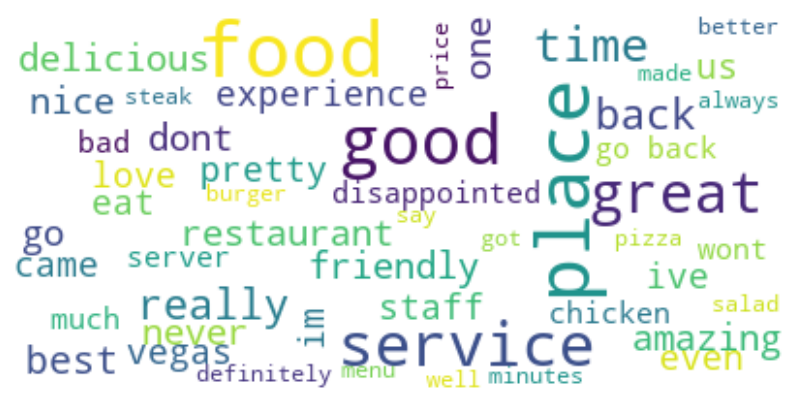

In [89]:
wordcloud = WordCloud(max_font_size = 40,
                      max_words=50,
                     background_color = "white").generate(tumyorumlar)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Şablona Göre Word Cloud

In [90]:
mask = np.array(Image.open("logo.png"))

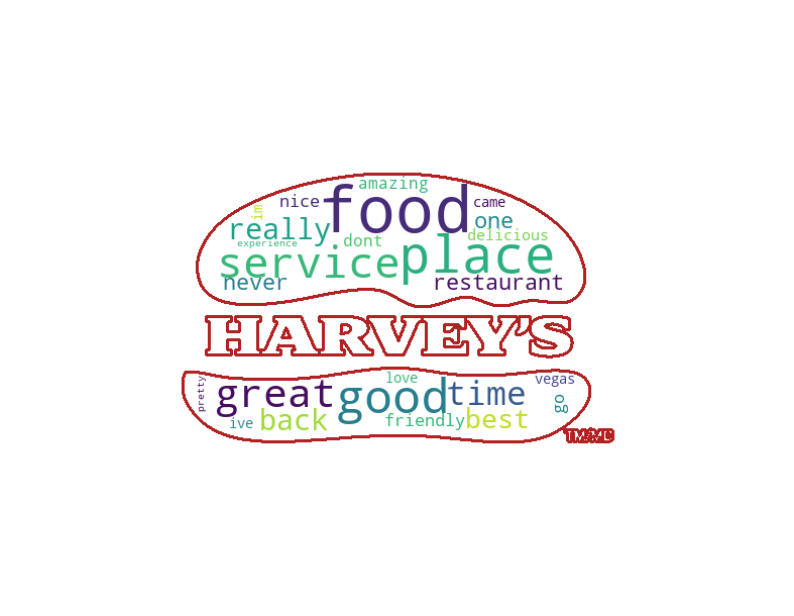

In [91]:
wc = WordCloud(background_color = "white",
                     max_words = 25, 
                     mask = mask, 
                     contour_width = 3,
                     contour_color = "firebrick")

wc.generate(tumyorumlar)
wc.to_file("logo_kelimebulutu.png")
plt.figure(figsize = [10,10])
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Uçtan Uca Metin Sınıflandırma Modeli

## Test-Train

In [92]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["text"],
                                                                   df["label"], 
                                                                    random_state = 1)

In [93]:
train_y[0:5]

298    negatif
160    negatif
268    pozitif
658    pozitif
996    negatif
Name: label, dtype: object

In [94]:
test_y[0:5]

507    negatif
818    negatif
452    negatif
368    pozitif
242    negatif
Name: label, dtype: object

In [95]:
encoder = preprocessing.LabelEncoder()

In [96]:
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [97]:
train_y[0:5]

array([0, 0, 1, 1, 0])

In [98]:
test_y[0:5]

array([0, 0, 0, 1, 0])

# Count Vectors

In [99]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer()

In [100]:
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [101]:
vectorizer.get_feature_names()[0:5]

['absolutely', 'absolutley', 'accident', 'accommodations', 'accomodate']

In [102]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# TF-IDF

#### wordlevel

In [103]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

TfidfVectorizer()

In [104]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [105]:
 tf_idf_word_vectorizer.get_feature_names()[0:5]

['absolutely', 'absolutley', 'accident', 'accommodations', 'accomodate']

In [106]:
x_train_tf_idf_word.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.44166712],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### ngram level tf-idf

In [107]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(train_x)

TfidfVectorizer(ngram_range=(2, 3))

In [108]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

#### characters level tf-idf

In [109]:
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(train_x)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [110]:
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(train_x)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(test_x)

# Makine Öğrenmesi ile Sentiment Sınıflandırması

#### Lojistik Regresyon

In [161]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.716


In [112]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.6839999999999999


In [113]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.5680000000000002


In [114]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.6639999999999999


#### Naive Bayes

In [115]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.716


In [116]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.712


In [117]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.5680000000000002


In [118]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.644


#### Random Forests

In [119]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.708


In [120]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.688


In [121]:
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.5680000000000002


In [122]:
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.6639999999999999


#### XGBoost

In [123]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.6439999999999999


In [124]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.6519999999999999


In [125]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.5359999999999999


In [126]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.58


## En Yüksek Doğruluk Oranına Sahip Modelin Testi

In [162]:
loj_model

LogisticRegression()

In [163]:
yeni_yorum = pd.Series("this food is very nice and fast")

In [164]:
yeni_yorum1= pd.Series("food was uncooked and cold")


In [165]:
v = CountVectorizer()
v.fit(train_x)

CountVectorizer()

In [166]:
yeni_yorum = v.transform(yeni_yorum)

In [167]:
loj_model.predict(yeni_yorum)

array([1])

In [168]:
yeni_yorum1 = v.transform(yeni_yorum1)

In [170]:
loj_model.predict(yeni_yorum1)

array([0])

In [171]:
yeni_yorum2=pd.Series("food was not hot enough and service was poor")

In [172]:
yeni_yorum2 = v.transform(yeni_yorum2)

In [173]:
loj_model.predict(yeni_yorum2)

array([0])